In [1]:
import pandas as pd
df=pd.read_csv('c:/data/time/data2.csv')
df.head()

,date,price
0,1991-01-01,12588862
1,1991-02-01,12154321
2,1991-03-01,14337072
3,1991-04-01,15108570
4,1991-05-01,17225734


               price
date                
1991-01-31  12588862
1991-02-28  12154321
1991-03-31  14337072
1991-04-30  15108570
1991-05-31  17225734


<AxesSubplot:xlabel='date'>

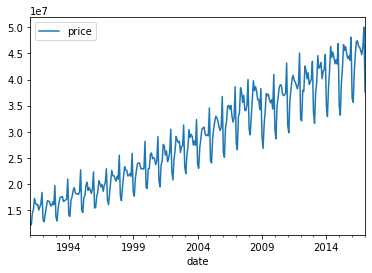

In [2]:
from pandas.tseries.offsets import MonthEnd
df['date']=pd.to_datetime(df['date'])+MonthEnd(1)
df=df.set_index('date')
print(df.head())
df.plot()

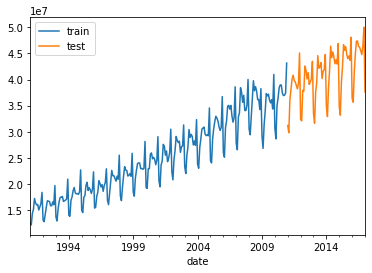

In [3]:
import matplotlib.pyplot as plt
split_date=pd.Timestamp('01-01-2011')
train=df.loc[:split_date,['price']]
test=df.loc[split_date:,['price']]
ax=train.plot()
test.plot(ax=ax)
plt.legend(['train','test'])

In [4]:
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
sc.fit(train)
train_sc=sc.transform(train)
test_sc=sc.transform(test)
train_sc[:10]

array([[0.01402033],
       [0.        ],
       [0.0704258 ],
       [0.09531795],
       [0.16362761],
       [0.13514108],
       [0.12395846],
       [0.12617398],
       [0.09230917],
       [0.11139526]])

In [5]:
train_sc_df=pd.DataFrame(train_sc, columns=['Scaled'],index=train.index)
test_sc_df=pd.DataFrame(test_sc, columns=['Scaled'],index=test.index)
train_sc_df.head()

,Scaled
date,
1991-01-31,0.014020
1991-02-28,0.000000
1991-03-31,0.070426
1991-04-30,0.095318
1991-05-31,0.163628


In [6]:
s=pd.Series([100,200,300])
s2=s.shift(1)
print(s)
print(s2)

0    100
1    200
2    300
dtype: int64
0      NaN
1    100.0
2    200.0
dtype: float64


In [7]:
for s in range(1,13):
    train_sc_df['shift_{}'.format(s)]=train_sc_df['Scaled'].shift(s)
    test_sc_df['shift_{}'.format(s)]=test_sc_df['Scaled'].shift(s)
train_sc_df.head(13)

,Scaled,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
date,,,,,,,,,,,,,
1991-01-31,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-02-28,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-03-31,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-04-30,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-05-31,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-06-30,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-07-31,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN
1991-08-31,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN
1991-09-30,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN


In [8]:
X_train=train_sc_df.dropna().drop('Scaled',axis=1)
y_train=train_sc_df.dropna()[['Scaled']]

X_test=test_sc_df.dropna().drop('Scaled',axis=1)
y_test=test_sc_df.dropna()[['Scaled']]

In [9]:
X_train=X_train.values
X_test=X_test.values
y_train=y_train.values
y_test=y_test.values
print(X_train)
print(y_train)

[[0.20091289 0.13173822 0.11139526 ... 0.0704258  0.         0.01402033]
 [0.03002688 0.20091289 0.13173822 ... 0.09531795 0.0704258  0.        ]
 [0.01999285 0.03002688 0.20091289 ... 0.16362761 0.09531795 0.0704258 ]
 ...
 [0.79916654 0.81439355 0.86398323 ... 0.92972161 0.71629034 0.77368724]
 [0.80210057 0.79916654 0.81439355 ... 0.59734863 0.92972161 0.71629034]
 [0.81482896 0.80210057 0.79916654 ... 0.53166512 0.59734863 0.92972161]]
[[0.03002688]
 [0.01999285]
 [0.06596369]
 [0.10983126]
 [0.14912986]
 [0.14718865]
 [0.14464787]
 [0.11898427]
 [0.11802682]
 [0.14222108]
 [0.12459168]
 [0.24290801]
 [0.04899091]
 [0.02408276]
 [0.09865054]
 [0.14480155]
 [0.17061844]
 [0.17067229]
 [0.17603636]
 [0.1449117 ]
 [0.14957943]
 [0.15381982]
 [0.16036484]
 [0.28308682]
 [0.05971347]
 [0.05306762]
 [0.15199345]
 [0.17230214]
 [0.21246911]
 [0.23131079]
 [0.1982186 ]
 [0.19187716]
 [0.19381714]
 [0.18857277]
 [0.20528237]
 [0.33988685]
 [0.08949179]
 [0.07634802]
 [0.17110473]
 [0.181320

In [10]:
X_train_t=X_train.reshape(X_train.shape[0],12,1)
X_test_t=X_test.reshape(X_test.shape[0],12,1)
print("최종 DATA")
print(X_train_t.shape)
print(X_train_t)
print(y_train)

최종 DATA
(228, 12, 1)
[[[0.20091289]
  [0.13173822]
  [0.11139526]
  ...
  [0.0704258 ]
  [0.        ]
  [0.01402033]]

 [[0.03002688]
  [0.20091289]
  [0.13173822]
  ...
  [0.09531795]
  [0.0704258 ]
  [0.        ]]

 [[0.01999285]
  [0.03002688]
  [0.20091289]
  ...
  [0.16362761]
  [0.09531795]
  [0.0704258 ]]

 ...

 [[0.79916654]
  [0.81439355]
  [0.86398323]
  ...
  [0.92972161]
  [0.71629034]
  [0.77368724]]

 [[0.80210057]
  [0.79916654]
  [0.81439355]
  ...
  [0.59734863]
  [0.92972161]
  [0.71629034]]

 [[0.81482896]
  [0.80210057]
  [0.79916654]
  ...
  [0.53166512]
  [0.59734863]
  [0.92972161]]]
[[0.03002688]
 [0.01999285]
 [0.06596369]
 [0.10983126]
 [0.14912986]
 [0.14718865]
 [0.14464787]
 [0.11898427]
 [0.11802682]
 [0.14222108]
 [0.12459168]
 [0.24290801]
 [0.04899091]
 [0.02408276]
 [0.09865054]
 [0.14480155]
 [0.17061844]
 [0.17067229]
 [0.17603636]
 [0.1449117 ]
 [0.14957943]
 [0.15381982]
 [0.16036484]
 [0.28308682]
 [0.05971347]
 [0.05306762]
 [0.15199345]
 [0.172

In [12]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model=Sequential()
model.add(LSTM(20,input_shape=(12,1)))
model.add(Dense(1))
model.compile(loss='mse',optimizer='adam')

In [13]:
model.fit(X_train_t, y_train, epochs=250, batch_size=30,verbose=1)

Epoch 1/250
8/8 [==============================] - 1s 3ms/step - loss: 0.2528
Epoch 2/250
8/8 [==============================] - 0s 3ms/step - loss: 0.1545
Epoch 3/250
8/8 [==============================] - 0s 3ms/step - loss: 0.0840
Epoch 4/250
8/8 [==============================] - 0s 4ms/step - loss: 0.0288
Epoch 5/250
8/8 [==============================] - 0s 4ms/step - loss: 0.0161
Epoch 6/250
8/8 [==============================] - 0s 4ms/step - loss: 0.0180
Epoch 7/250
8/8 [==============================] - 0s 4ms/step - loss: 0.0157
Epoch 8/250
8/8 [==============================] - 0s 4ms/step - loss: 0.0119
Epoch 9/250
8/8 [==============================] - 0s 4ms/step - loss: 0.0129
Epoch 10/250
8/8 [==============================] - 0s 3ms/step - loss: 0.0106
Epoch 11/250
8/8 [==============================] - 0s 3ms/step - loss: 0.0110
Epoch 12/250
8/8 [==============================] - 0s 3ms/step - loss: 0.0102
Epoch 13/250
8/8 [==============================] - 0s 3ms/st

In [14]:
score=model.evaluate(X_test_t, y_test, verbose=0)
print(score) 
y_pred = model.predict(X_test_t)
print(y_pred.flatten()[:10])
print(y_test.flatten()[:10])

0.0021796710789203644
[0.66120875 0.60117704 0.7908191  0.84605783 0.90320843 0.928992
 0.90476334 0.8993296  0.8841514  0.8681157 ]
[0.65198848 0.6431242  0.83176496 0.82666946 0.98182284 0.95616179
 0.90265615 0.94107108 0.86841056 0.88189991]


In [15]:
import numpy as np
np.mean(y_test.flatten()- y_pred.flatten())

0.030997343929255468

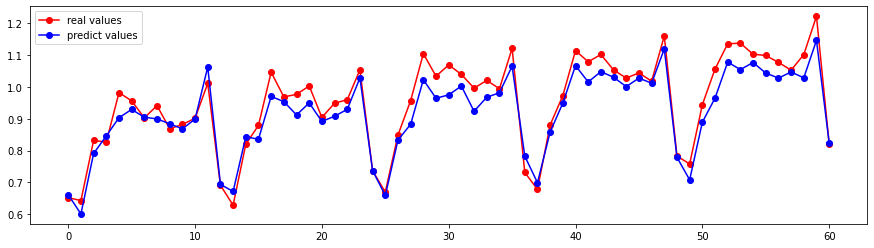

In [16]:
fig = plt.figure(figsize=(15, 4))
plt.plot(y_test.flatten(), 'ro-', label='real values')
plt.plot(y_pred.flatten(), 'bo-', label='predict values')
plt.legend()
plt.show()